## Từ bộ dữ liệu MNIST handwritten digit, ta sẽ xây dựng nên một mô hình nhận dạng chữ số từ 0-9.

- Input: Ảnh được lưu dưới dạng ma trận 28x28

- Output: Chữ số từ 0-9

## 1. Import các thư viện cần thiết

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid

## 2. Sử dụng tensorflow để lấy data về

In [52]:

# Tải dataset MNIST
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

### 2.1 Ta sẽ xem thông tin về tập dữ liệu này

In [53]:
print("Train Images Shape: ", X_train.shape)
print("Train Labels Shape: ", y_train.shape)
print("Test Images Shape: ", X_test.shape)
print("Test Labels Shape: ", y_test.shape)

Train Images Shape:  (60000, 28, 28)
Train Labels Shape:  (60000,)
Test Images Shape:  (10000, 28, 28)
Test Labels Shape:  (10000,)


In [54]:
print(X_train[0])
print(y_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

Từ thông tin trên, ta có các thông tin như sau:

- Tập train: gồm 60000 mẫu dữ liệu, mỗi mẫu dữ liệu là một ma trận 28x28. Mỗi phần tử trong ma trận có giá trị từ 0-255. Mỗi mẫu sẽ được gán nhãn cho một chữ số từ 0-9.

- Tập test: gồm 10000 mẫu dữ liệu

### 2.2 Scale dữ liệu

Vì giá trị của các phần tử có giá trị từ 0-255, tức là mức độ phân bố khá rộng nên ta sẽ scale dữ liệu xuống 0-1 bằng Min-Max Normalization

$$x_{norm} = \frac{x - x_{min}}{x_{max} - x_{min}}$$

In [55]:
x_min = 0
x_max = 255
# Chuẩn hoá giá trị từ 0-255 xuống 0-1
X_train = (X_train-x_min) / (x_max-x_min)
X_test = (X_test-x_min) / (x_max-x_min)
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

### 2.3 Hiển thị ảnh

Vì khi lưu ảnh bằng ma trận với các chữ số thì rất khó hình dung, nên ta sẽ thử trực quan hoá 25 bức ảnh đầu tiên của tập dữ liệu này.

Ta dùng hàm imshow trong thư viện matplotlib để hiển thị một ma trận 2 chiều. Nó sẽ hiển thị các màu sắc tương ứng với các giá trị điểm ảnh để hiển thị

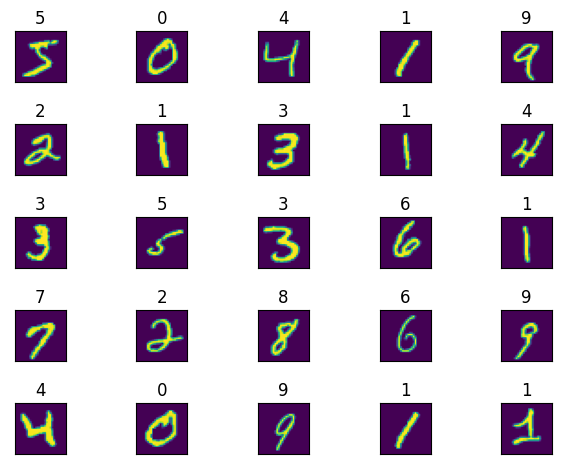

In [56]:
# Tạo một khung hiển thị 5x5
fig, ax = plt.subplots(nrows=5, ncols=5)

# Ta làm phẳng khung này để dễ truy xuất
ax = ax.flatten()
for i in range(25):
    img = X_train[i]
    ax[i].imshow(img, cmap='viridis')
    #Xoá giá trị trục x,y
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    #Hiển thị label của ảnh
    ax[i].set_title(y_train[i])
plt.tight_layout()
plt.show()

## 3.Xây dựng mô hình 

Ta sẽ xây dựng mô hình NN 3-layer để nhận diện chữ viết tay này

In [57]:
model = Sequential([
    tf.keras.Input(shape = (28*28,)),
    Dense(units = 25,activation = 'relu'),
    Dense(units = 15,activation = 'relu'),
    Dense(units = 10,activation = 'linear'),
])

In [58]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 25)                19625     
                                                                 
 dense_19 (Dense)            (None, 15)                390       
                                                                 
 dense_20 (Dense)            (None, 10)                160       
                                                                 
Total params: 20,175
Trainable params: 20,175
Non-trainable params: 0
_________________________________________________________________


Mô hình này gồm 3 lớp:

- Layer 1 có 25 units, sử dụng hàm activation là ReLU

- Layer 1 có 15 units, sử dụng hàm activation là ReLU

- Layer 3 (output) có 10 units, sử dụng hàm activation là Linear

Ta dùng hàm linear cho output chứ không phải softmax vì khi train dữ liệu, ta sẽ đưa trực tiếp dữ liệu này cho hàm lost chứ không phải trung gian để tránh sai số.

In [59]:
[layer1, layer2, layer3] = model.layers

Ta coi các đầu vào, đầu ra của các trọng số các lớp

In [60]:
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


- Mỗi unit của layer 1 sẽ nhận 784 điểm đầu vào và layer 1 cho ra 25 điểm

- Mỗi unit của layer 2 sẽ nhận 25 điểm đầu vào từ layer 1 và layer 2 cho ra 15 điểm

- Mỗi unit của lớp 3 sẽ nhận 15 điểm đầu vào và layer 3 cho ra 10 điểm.

Ta thiết lập hàm lost function và phương thức tối ưu

In [61]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001)
              )

Vì ta đã định nghĩa đầu vào và 28*28, nên ta cần chuyển dạng của X_train và X_test

In [62]:
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

In [63]:
X_train.shape

(60000, 784)

Tiến hành train model với epochs = 25

In [64]:
model.fit(X_train,y_train,epochs=25)

Epoch 1/25
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4253
Epoch 2/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2152
Epoch 3/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1776
Epoch 4/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1534
Epoch 5/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1371
Epoch 6/25
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1252
Epoch 7/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1170
Epoch 8/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1071
Epoch 9/25
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1011
Epoch 10/25
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0944
Epoch 11/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0900
Epoch 12/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0853


Ta thử lấy một mẫu dữ liệu ngẫu nhiên trong tập test để xem mô hình sẽ gán nhãn gì 

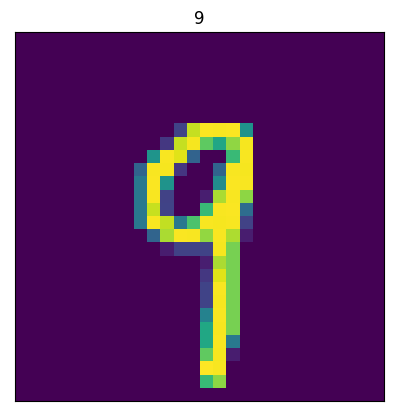

In [66]:

img = X_test[1904].reshape((28,28))
plt.imshow(img, cmap='viridis')
plt.xticks([])
plt.yticks([])
plt.title(y_test[1904])
plt.show()

In [72]:
prediction = model.predict(X_test[1904].reshape(1,784))
print(f"Mo hinh du doan: {np.argmax(prediction)}")

1/1 [==============================] - 0s 39ms/step
Mo hinh du doan: 9


Khá chính xác

### 4 Đánh giá mô hình

In [74]:
predictions = model.predict(X_test)

# Lấy vị trí của giá trị lớn nhất trong mỗi vector dự đoán để làm nhãn
predicted_labels = np.argmax(predictions, axis=1)

# Tính toán độ chính xác bằng cách so sánh giá trị dự đoán với nhãn thực tế
accuracy = np.mean(predicted_labels == y_test)

print('Test accuracy:', accuracy)

313/313 [==============================] - 1s 2ms/step
Test accuracy: 0.9632


Vậy mô hình có độ chính xác là 0.9632 trên 10000 mẫu dữ liệu